In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
path = '/content/gdrive/My Drive/Flipr 6//'

In [3]:
# Import Useful Libraries :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Import Datasets :
train = pd.read_excel(path+'Train-dataset.xlsx')
test1 = pd.read_excel(path+'Test-dataset.xlsx', sheet_name = "Test_data" )
test2 = pd.read_excel(path+'Test-dataset.xlsx', sheet_name="Foreign_Visitors_TS")

test2  =  test2.iloc[1:]
test2.columns  =  ['City', 'April', 'May', 'June', 'July', 'August']


## **Variable Description :**
![alt text](http://drive.google.com/uc?id=1fR28CvHs5L7PlxDF0pMwE6aUDrNWxfve)

In [5]:
train.shape, test1.shape, test2.shape

((787, 16), (501, 15), (501, 6))

In [6]:
train.head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,Maharashtra,M.C,12442373.0,11978450.0,878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115
1,Delhi,Delhi,M.C,11007835.0,9879172.0,858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188
2,Bangalore,Karnataka,MPUA,8436675.0,4301326.0,936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000
3,Hyderabad,Telangana,MPUA,6809970.0,3637483.0,930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123
4,Ahmedabad,Gujarat,MPUA,5570585.0,3520085.0,852.0,29.0,25.0,LOW,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204


In [7]:
test1.head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors
0,Tuensang,Nagaland,T.C,36774.0,NaN,931.0,23.0,10.0,MEDIUM,94.0,114.0,0.253390,34237.0,17.0,2769.0
1,Lakshmeshwar,Karnataka,T.M.C,36754.0,NaN,934.0,25.0,38.0,HIGH,62.0,160.0,0.192555,34328.0,13.0,636502.0
2,Zira,Punjab,M.Cl.,36732.0,NaN,883.0,29.0,35.0,HIGH,63.0,105.0,0.887882,32434.0,17.0,242367.0
3,Yawal,Maharashtra,M.Cl,36706.0,NaN,887.0,26.0,31.0,HIGH,60.0,174.0,0.407838,32558.0,11.0,4408916.0
4,Thana Bhawan,Uttar Pradesh,N.P.,36669.0,NaN,877.0,28.0,39.0,LOW,92.0,153.0,0.324456,32159.0,23.0,3104060.0


In [8]:
test2.head()

,City,April,May,June,July,August
1,Tuensang,1614,1946,2372,2500,2769
2,Lakshmeshwar,369179,445559,541045,572860,636502
3,Zira,140581,169665,206030,218138,242367
4,Yawal,2557179,3086249,3747597,3968032,4408916
5,Thana Bhawan,1800363,2172850,2638469,2793662,3104060


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               787 non-null    object 
 1   State              787 non-null    object 
 2   Type               787 non-null    object 
 3   Population [2011]  739 non-null    float64
 4   Popuation [2001]   295 non-null    float64
 5   Sex Ratio          777 non-null    float64
 6   Median Age         769 non-null    float64
 7   Avg Temp           770 non-null    float64
 8   SWM                783 non-null    object 
 9   Toilets Avl        761 non-null    float64
 10  Water Purity       629 non-null    float64
 11  H Index            647 non-null    float64
 12  Female Population  646 non-null    float64
 13  # of hospitals     772 non-null    float64
 14  Foreign Visitors   697 non-null    float64
 15  Covid Cases        787 non-null    int64  
dtypes: float64(11), int64(1), 

In [10]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               501 non-null    object 
 1   State              501 non-null    object 
 2   Type               499 non-null    object 
 3   Population [2011]  495 non-null    float64
 4   Popuation [2001]   0 non-null      float64
 5   Sex Ratio          496 non-null    float64
 6   Median Age         488 non-null    float64
 7   Avg Temp           487 non-null    float64
 8   SWM                492 non-null    object 
 9   Toilets Avl        479 non-null    float64
 10  Water Purity       482 non-null    float64
 11  H Index            486 non-null    float64
 12  Female Population  486 non-null    float64
 13  # of hospitals     484 non-null    float64
 14  Foreign Visitors   484 non-null    float64
dtypes: float64(11), object(4)
memory usage: 58.8+ KB


In [11]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 1 to 501
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    501 non-null    object
 1   April   446 non-null    object
 2   May     444 non-null    object
 3   June    469 non-null    object
 4   July    484 non-null    object
 5   August  501 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB


In [12]:
train.describe()

,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
count,7.390000e+02,2.950000e+02,777.000000,769.000000,770.000000,761.000000,629.000000,647.000000,6.460000e+02,772.000000,6.970000e+02,787.00000
mean,3.102834e+05,5.320451e+05,905.712999,26.183355,30.941558,96.086728,150.373609,0.497069,2.910011e+05,41.849741,1.457945e+06,6615.64676
std,8.874849e+05,1.067831e+06,37.018542,2.113063,6.968289,30.532991,29.063767,0.293421,8.354348e+05,29.086939,1.664151e+06,15108.10276
min,3.677600e+04,2.935400e+04,818.000000,23.000000,5.000000,50.000000,100.000000,0.003074,3.091300e+04,10.000000,7.980000e+02,334.00000
25%,5.255000e+04,1.694320e+05,877.000000,24.000000,28.000000,70.000000,125.000000,0.238586,4.514450e+04,18.000000,2.378540e+05,2270.00000
50%,7.910600e+04,2.366000e+05,906.000000,26.000000,31.000000,92.000000,150.000000,0.507004,8.306750e+04,28.000000,6.365020e+05,2582.00000
75%,2.374765e+05,4.745850e+05,928.000000,28.000000,36.000000,119.000000,176.000000,0.752517,2.206772e+05,67.000000,3.104060e+06,8761.00000
max,1.244237e+07,1.197845e+07,1042.000000,32.000000,40.000000,227.000000,200.000000,0.999774,1.092440e+07,159.000000,4.684707e+06,218502.00000


In [13]:
test1.describe()

,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors
count,495.000000,0.0,496.000000,488.000000,487.000000,479.000000,482.000000,486.000000,486.000000,484.000000,4.840000e+02
mean,24747.468687,NaN,895.508065,26.120902,29.100616,72.277662,151.358921,0.501042,22542.633745,19.173554,1.676301e+06
std,7813.067500,NaN,38.464150,2.145559,9.295788,20.799002,28.719191,0.284300,6931.232314,6.697149,1.704860e+06
min,110.000000,NaN,774.000000,23.000000,5.000000,10.000000,100.000000,0.000957,0.000000,3.000000,7.980000e+02
25%,21435.000000,NaN,867.750000,24.000000,26.000000,61.000000,127.000000,0.266619,19449.750000,14.000000,2.849730e+05
50%,25199.000000,NaN,890.500000,26.000000,31.000000,74.000000,152.000000,0.508218,22998.500000,20.000000,9.237370e+05
75%,30763.000000,NaN,922.000000,28.000000,36.000000,90.000000,175.000000,0.737776,27701.750000,25.000000,3.104060e+06
max,36774.000000,NaN,991.000000,32.000000,40.000000,100.000000,200.000000,0.999901,34523.000000,30.000000,4.684707e+06


In [14]:
test2.describe()

,City,April,May,June,July,August
count,501,446,444,469,484,501
unique,497,28,28,28,28,28
top,Shahpura,1800363,3279303,2638469,2793662,3104060
freq,2,51,50,53,55,56


******************************************************************************** 
 City


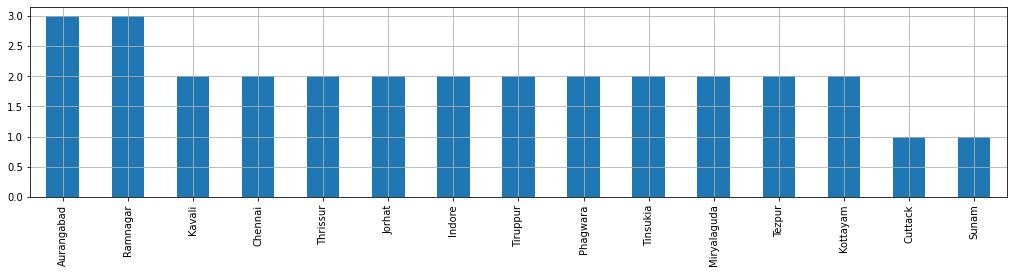

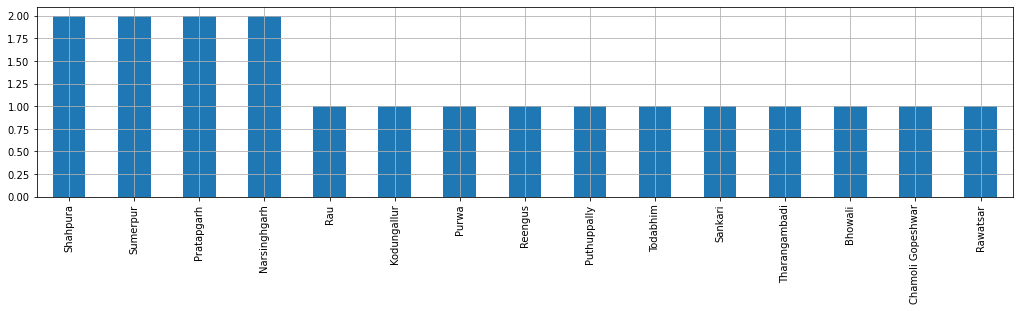

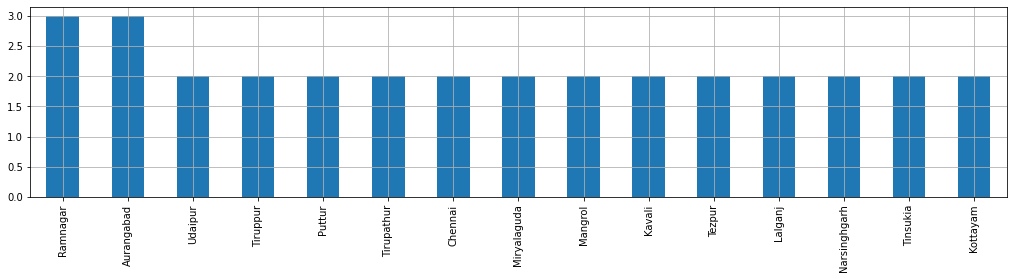

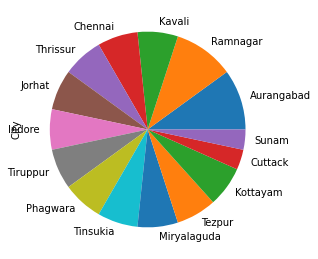

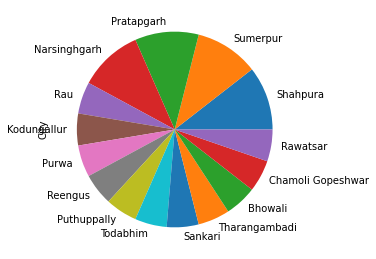

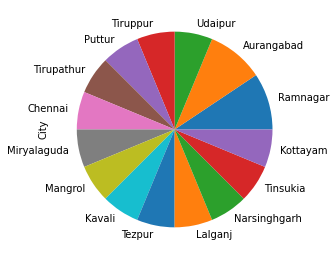

******************************************************************************** 
 State


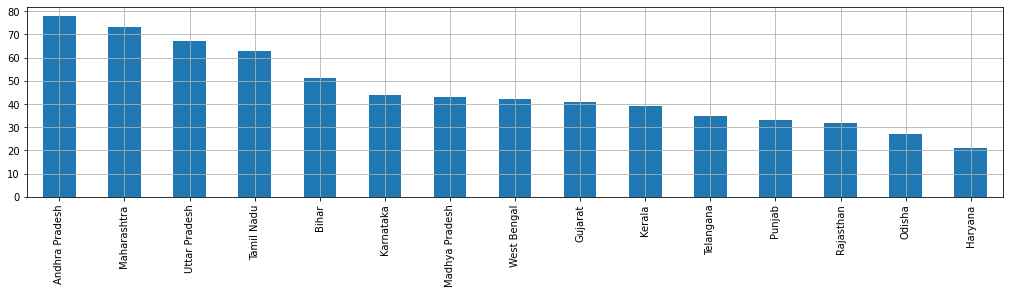

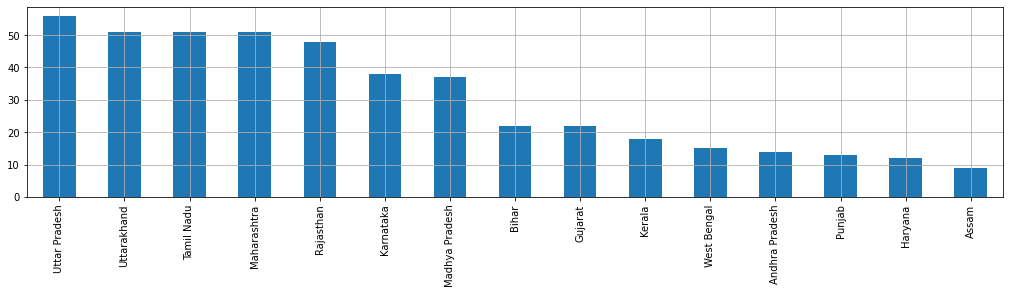

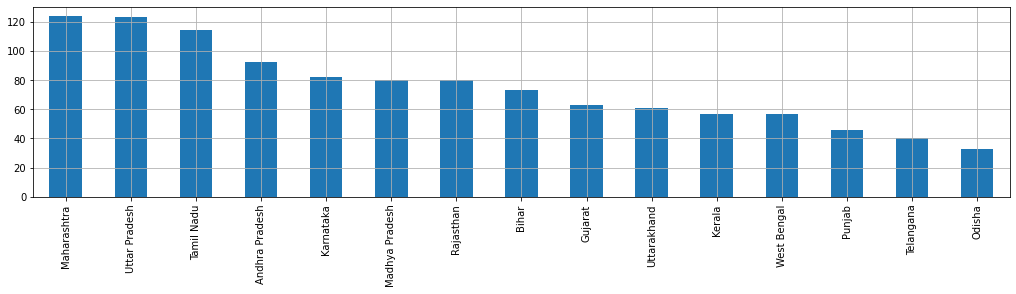

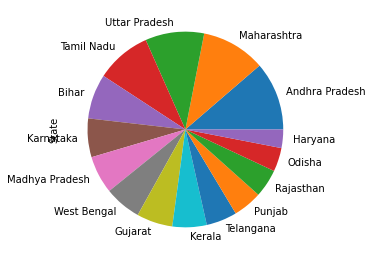

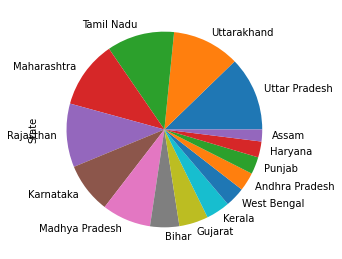

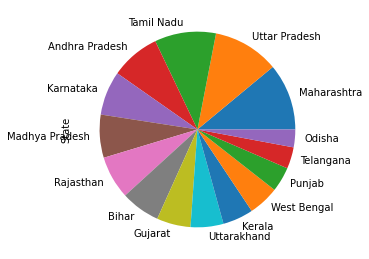

******************************************************************************** 
 Type


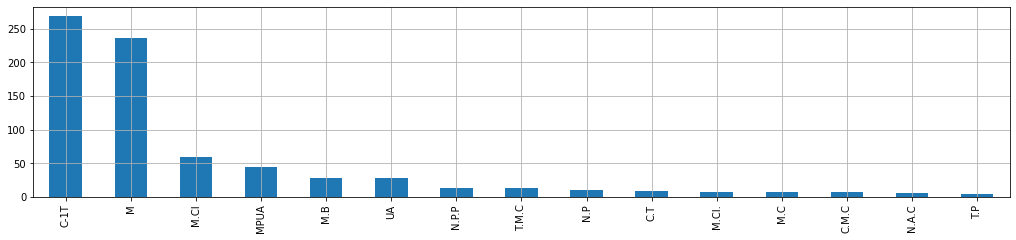

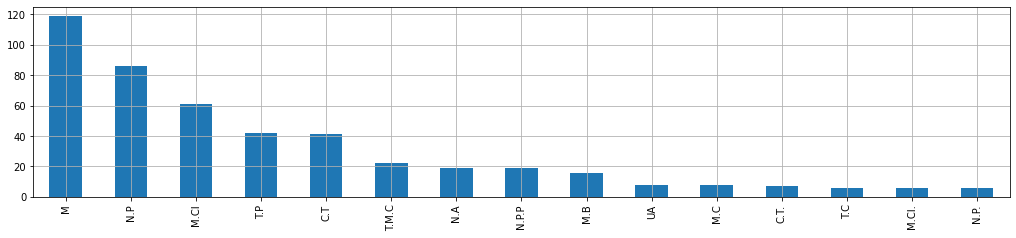

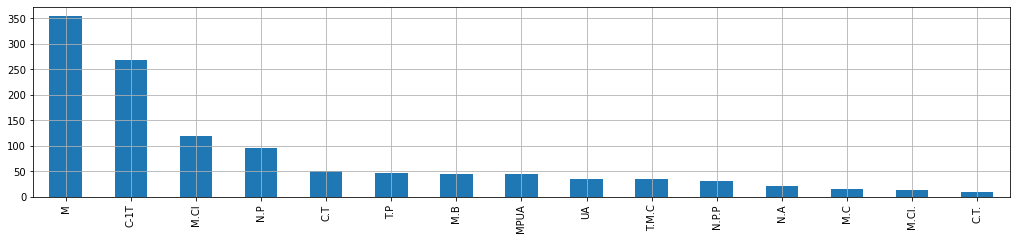

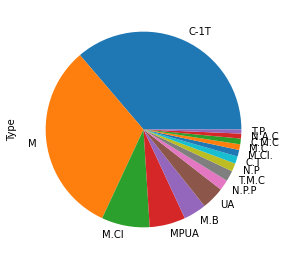

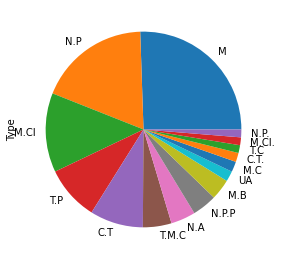

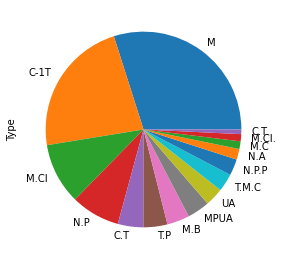

******************************************************************************** 
 Population [2011]


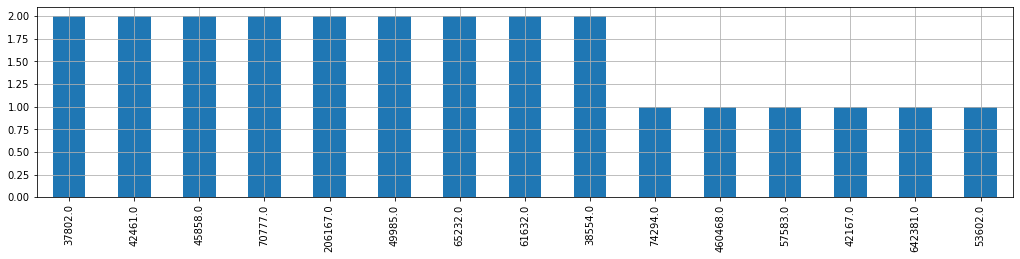

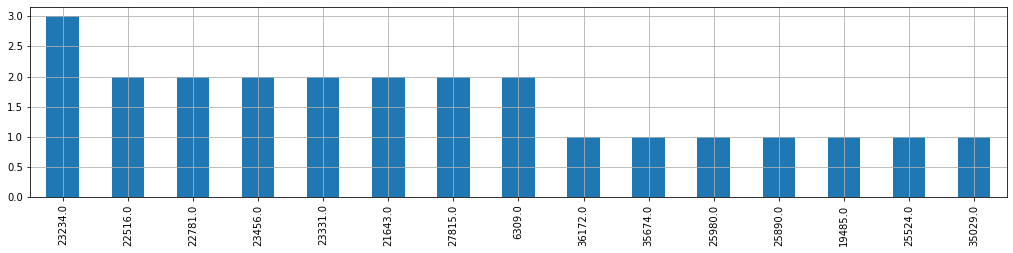

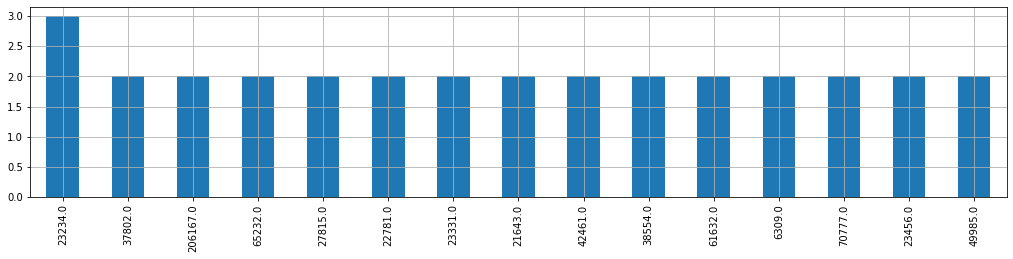

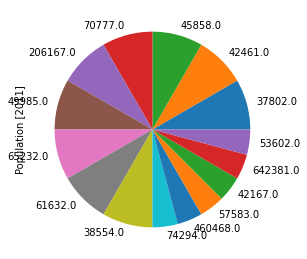

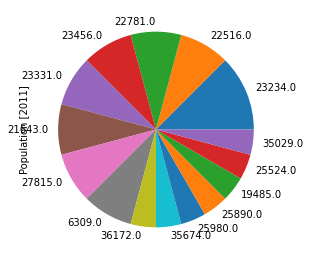

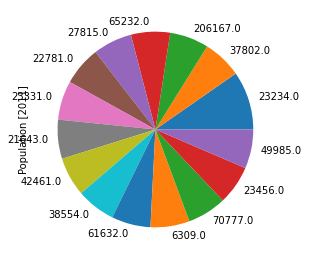

******************************************************************************** 
 Popuation [2001]


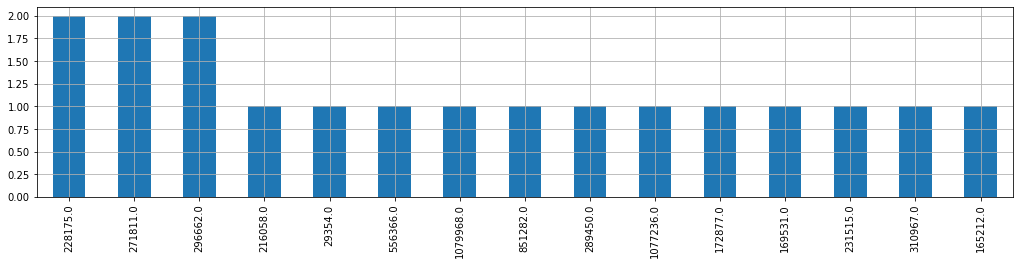

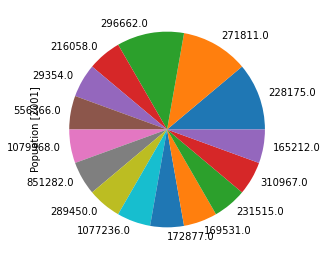

******************************************************************************** 
 Sex Ratio


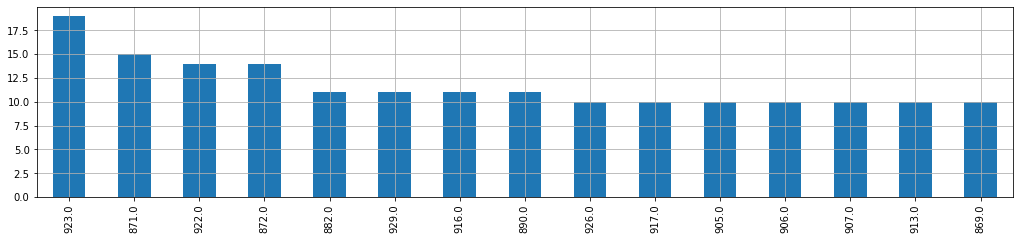

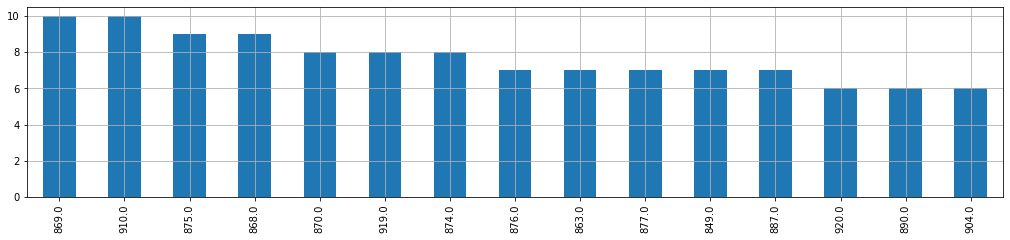

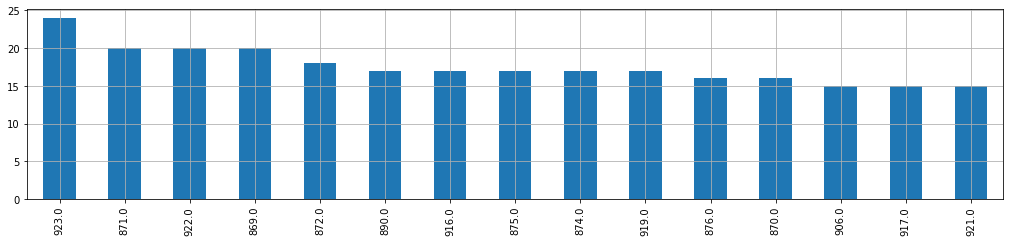

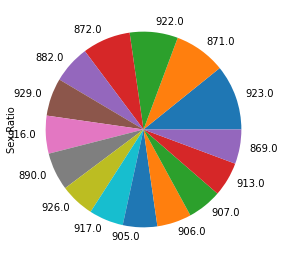

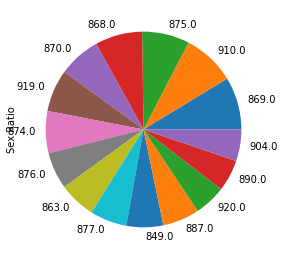

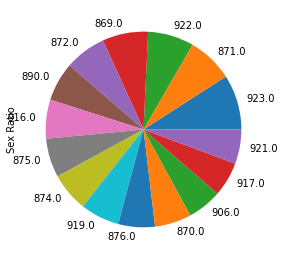

******************************************************************************** 
 Median Age


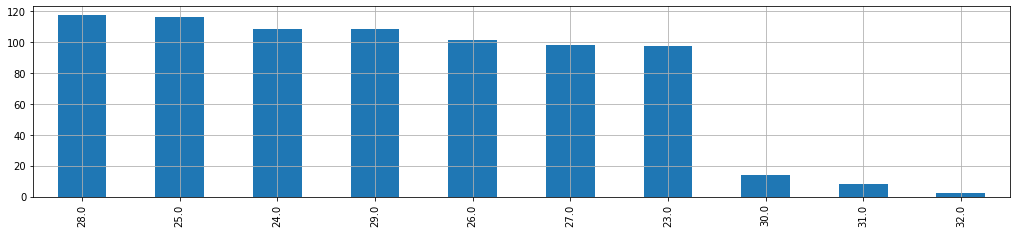

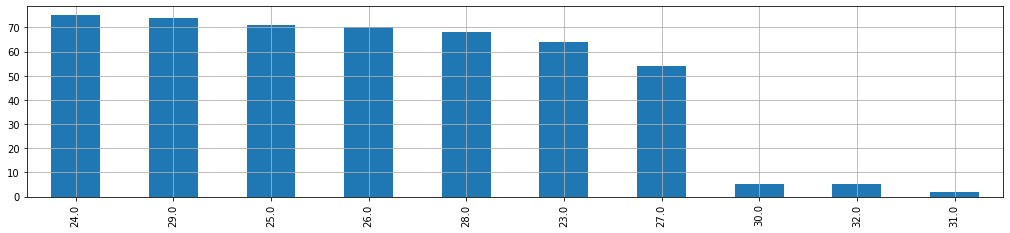

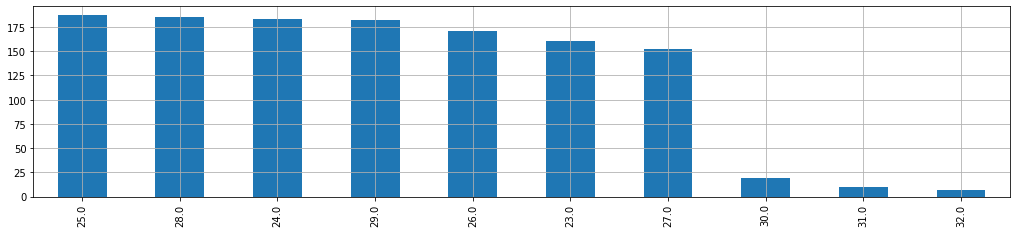

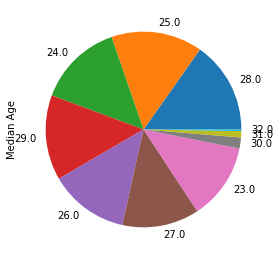

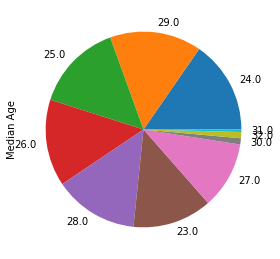

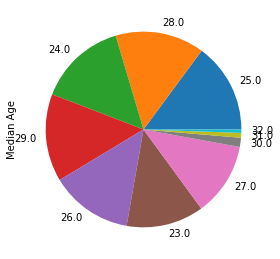

******************************************************************************** 
 Avg Temp


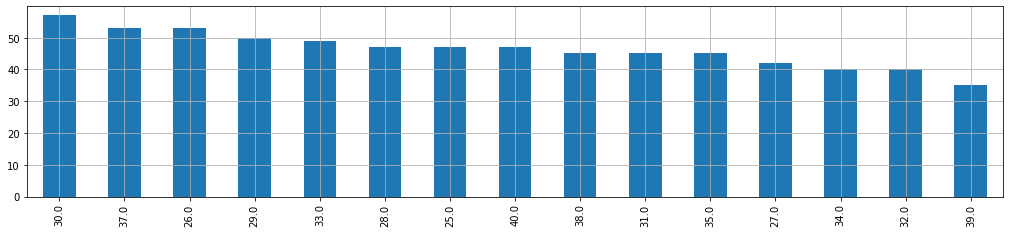

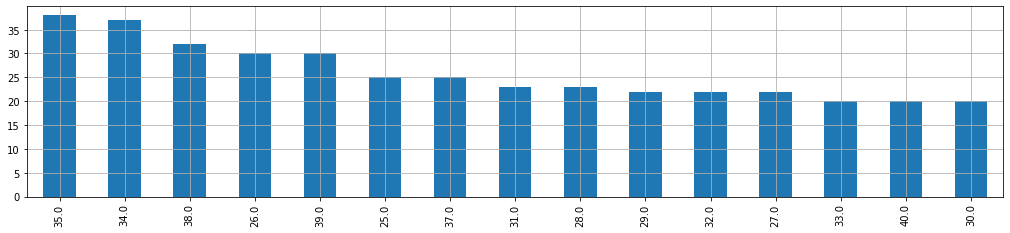

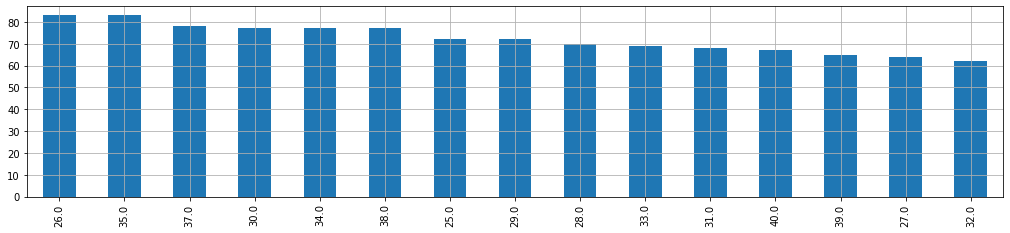

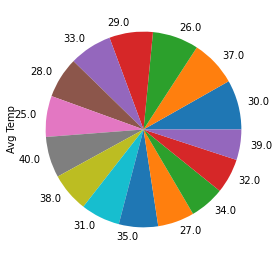

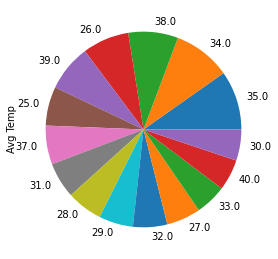

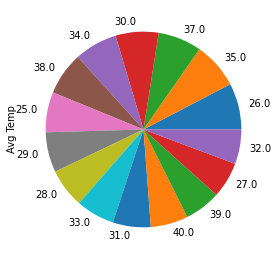

******************************************************************************** 
 SWM


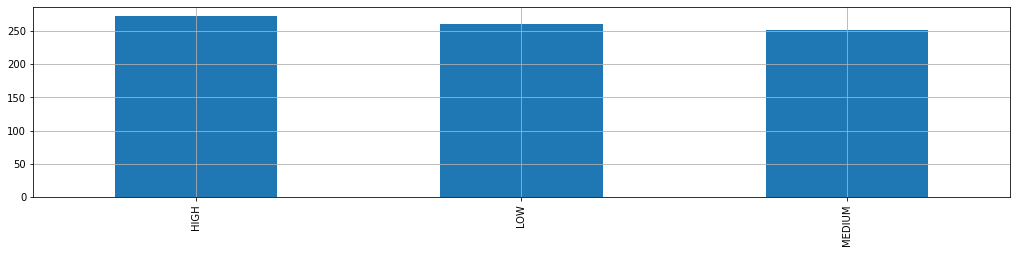

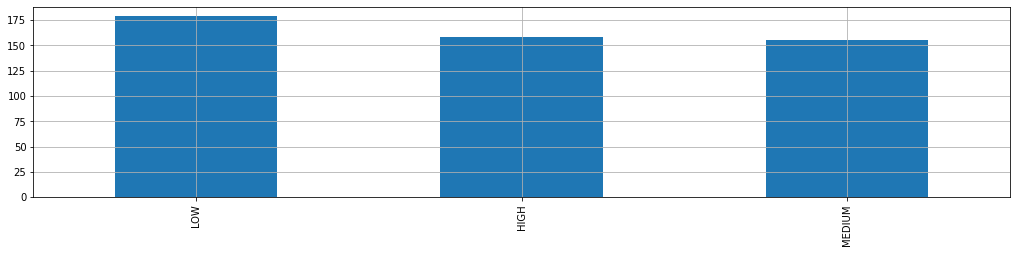

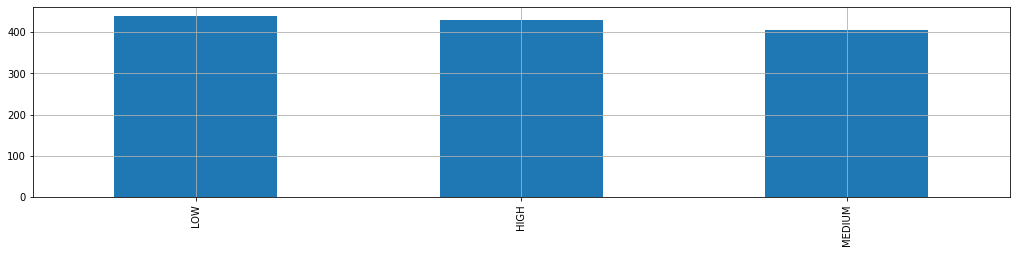

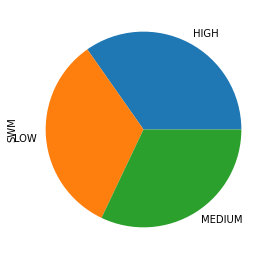

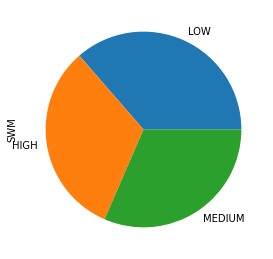

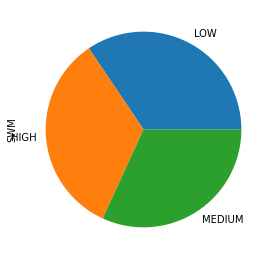

******************************************************************************** 
 Toilets Avl


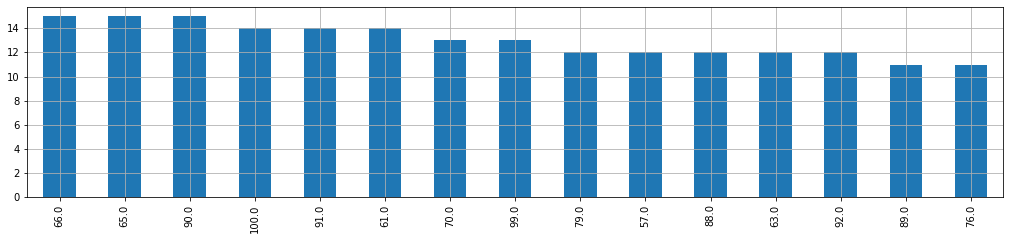

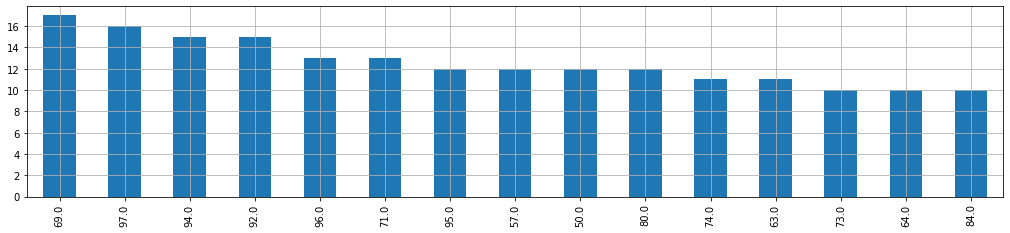

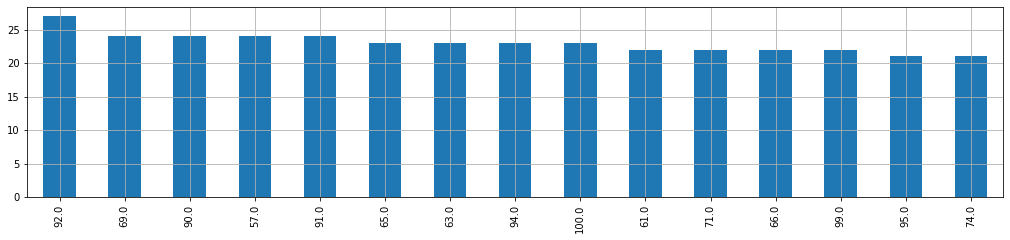

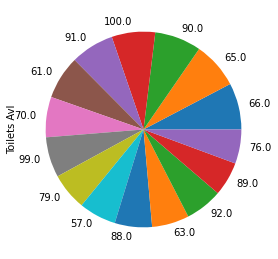

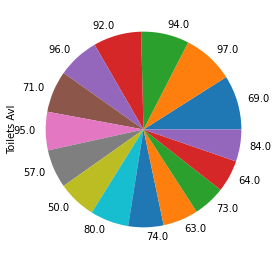

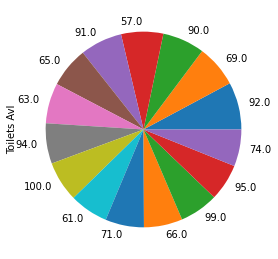

******************************************************************************** 
 Water Purity


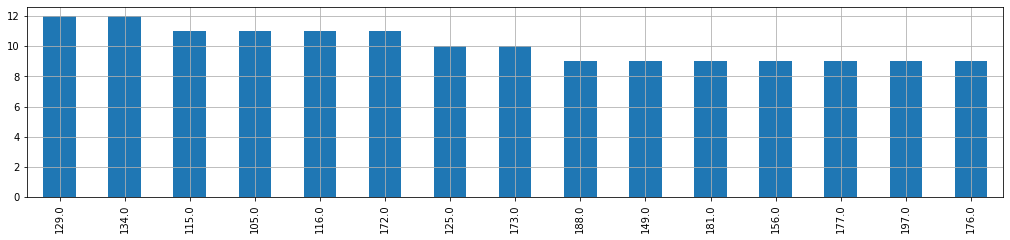

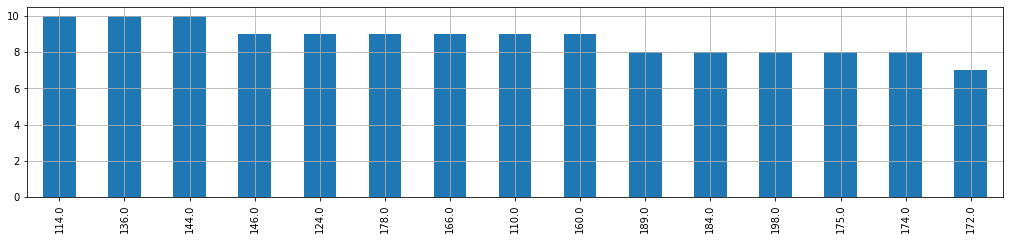

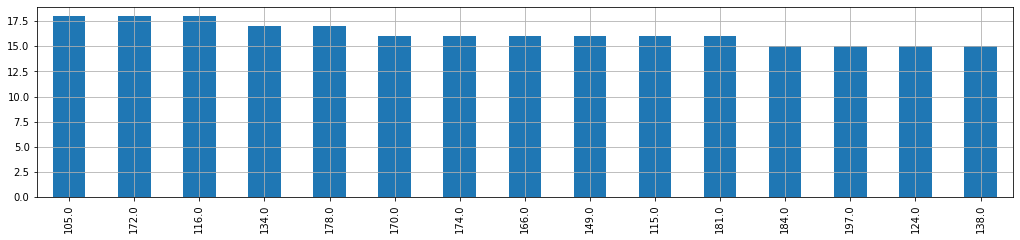

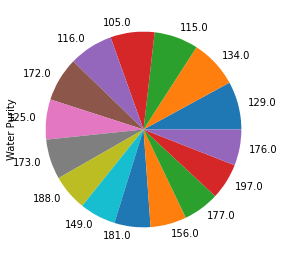

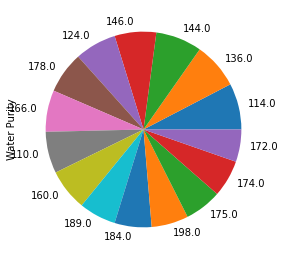

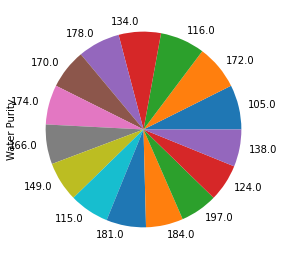

******************************************************************************** 
 H Index


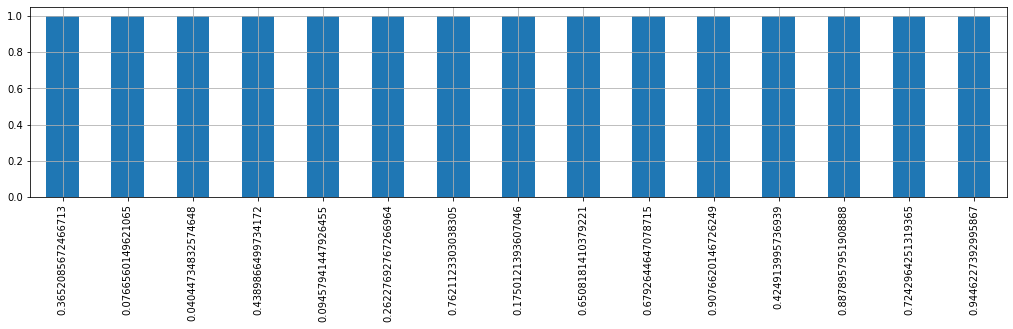

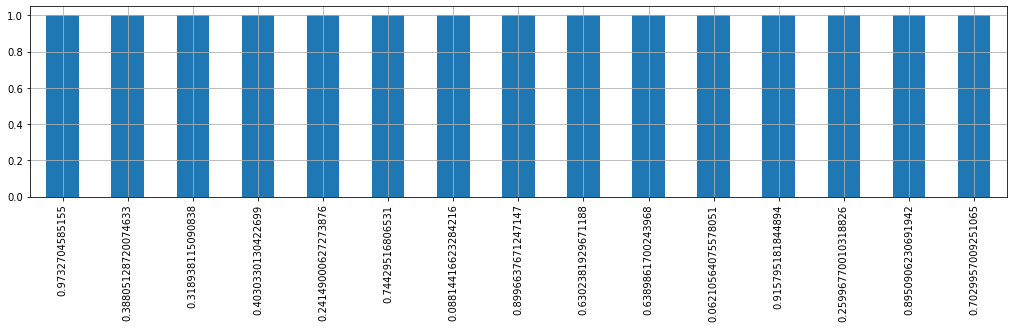

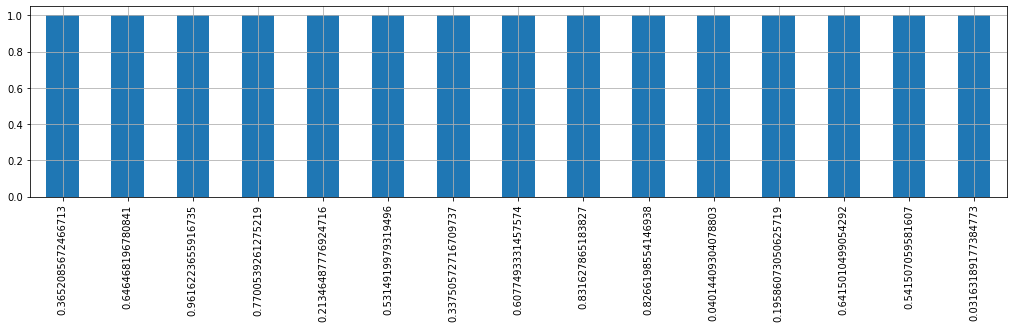

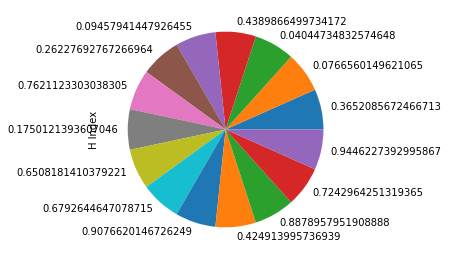

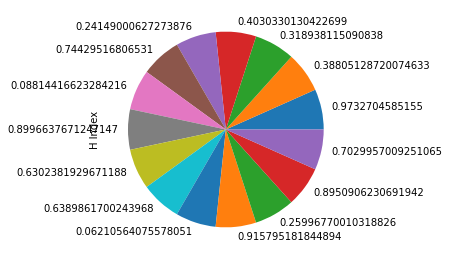

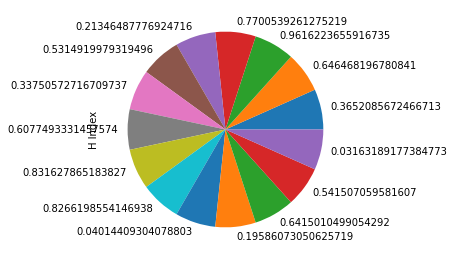

******************************************************************************** 
 Female Population


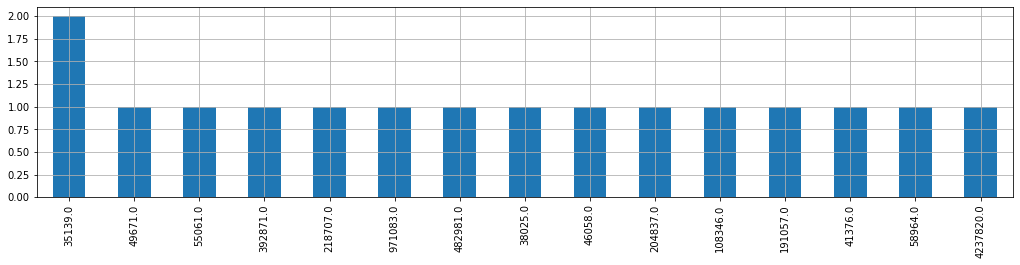

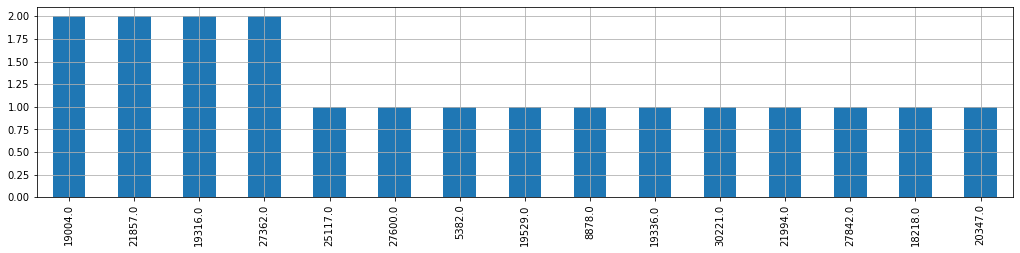

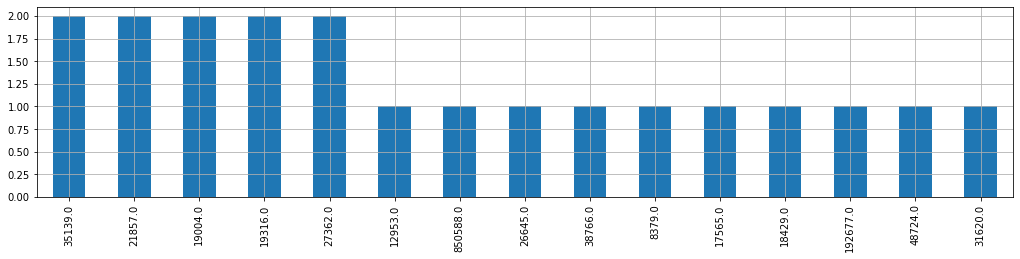

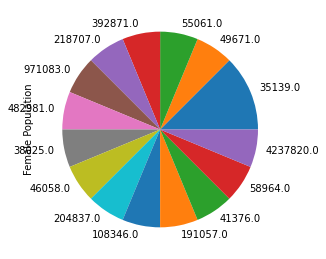

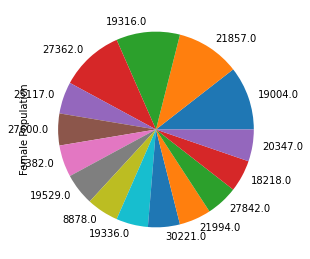

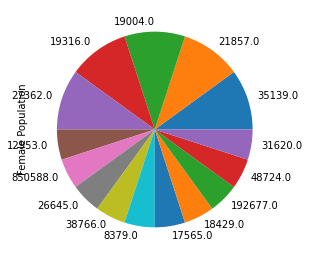

******************************************************************************** 
 # of hospitals


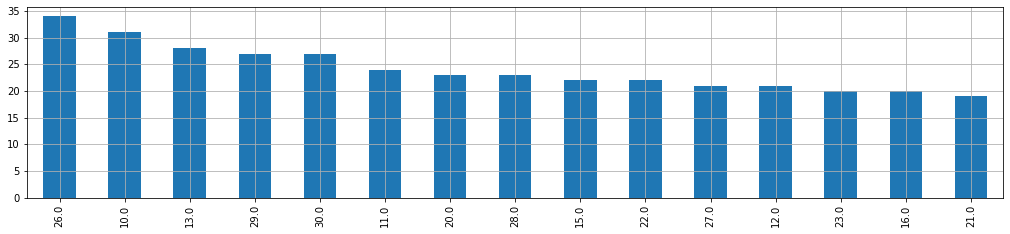

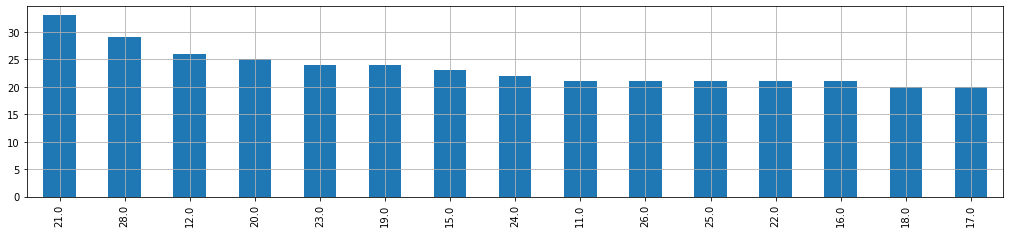

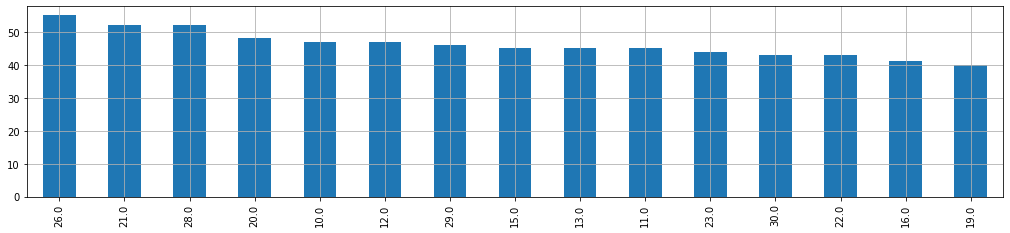

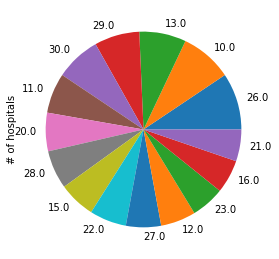

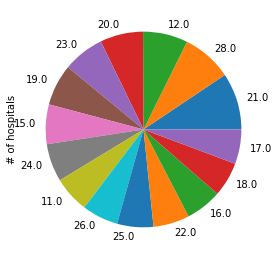

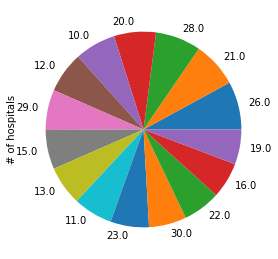

******************************************************************************** 
 Foreign Visitors


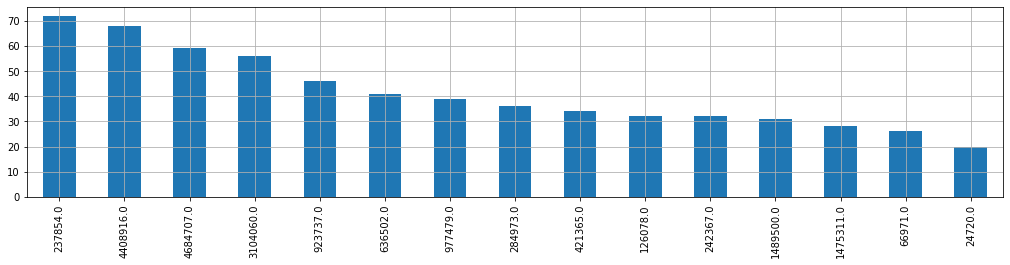

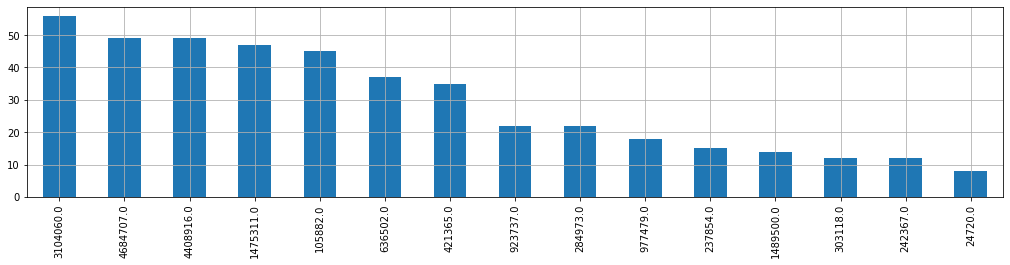

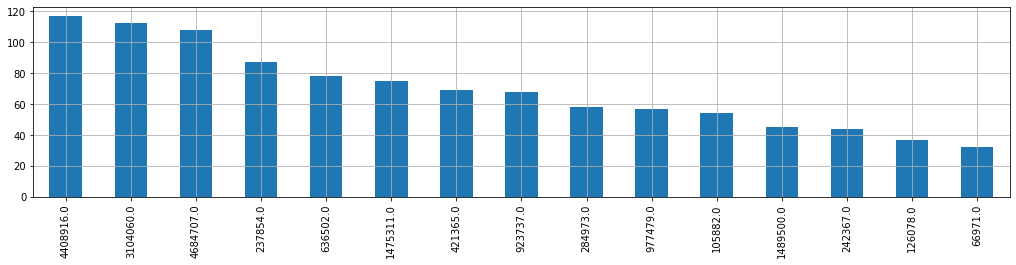

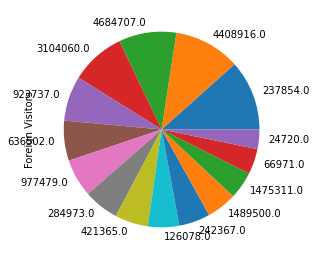

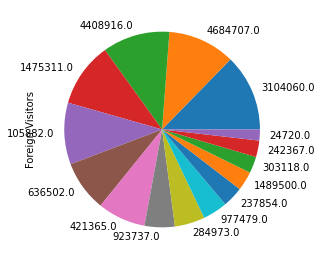

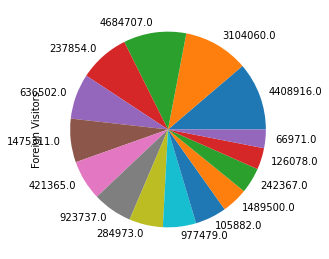

******************************************************************************** 
 Covid Cases


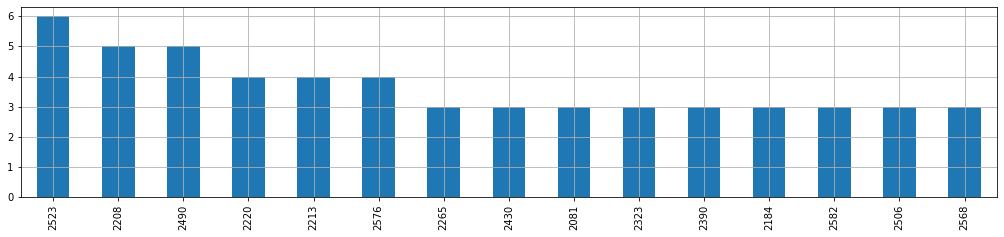

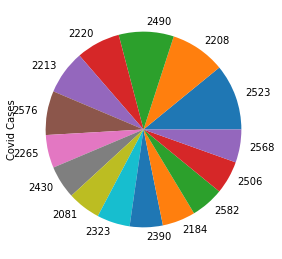

In [15]:
train_plus_test1  =  pd.concat([train, test1])


for  col  in train:
    print('*'*80, '\n', col)

    # Plot Bar Plots   for train, test, and train_plus_test1   for top-n values.
    train[col].value_counts().head(15).plot(kind = 'bar', figsize = [3.5*5,3.5], grid=True)
    plt.show()
    if col not in ['Covid Cases', 'Popuation [2001]']:
        test1[col].value_counts().head(15).plot(kind = 'bar', figsize = [3.5*5,3.5], grid=True)
        plt.show()
        train_plus_test1[col].value_counts().head(15).plot(kind = 'bar', figsize = [3.5*5,3.5], grid=True)
        plt.show()

    # Plot Pie Chart   for train, test, and train_plus_test1   for top-n values.
    train[col].value_counts().head(15).plot(kind = 'pie', figsize = [4.5,4.5], grid=True)
    plt.show()
    if col not in ['Covid Cases', 'Popuation [2001]']:
        test1[col].value_counts().head(15).plot(kind = 'pie', figsize = [4.5,4.5], grid=True)
        plt.show()
        train_plus_test1[col].value_counts().head(15).plot(kind = 'pie', figsize = [4.5,4.5], grid=True)
        plt.show()



In [16]:
try:
    from pandas_profiling import ProfileReport
except:
    !pip install pandas-profiling[notebook,html]
    from pandas_profiling import ProfileReport

profile = ProfileReport(train, title="train - Pandas Profiling Report")
profile.to_file(path + "train - Pandas Profiling Report.html")

profile = ProfileReport(test1, title="test1 - Pandas Profiling Report")
profile.to_file(path + "test1 - Pandas Profiling Report.html")

profile = ProfileReport(test2, title="test2 - Pandas Profiling Report")
profile.to_file(path + "test2 - Pandas Profiling Report.html")

